In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F


In [20]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
training_dataset

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)
print('train length: ', len(training_loader), 'val length', len(validation_loader))


train length:  600 val length 100


In [3]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0) # move channels: Color x w x h -> w x h x color
    print(image.shape)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image



(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


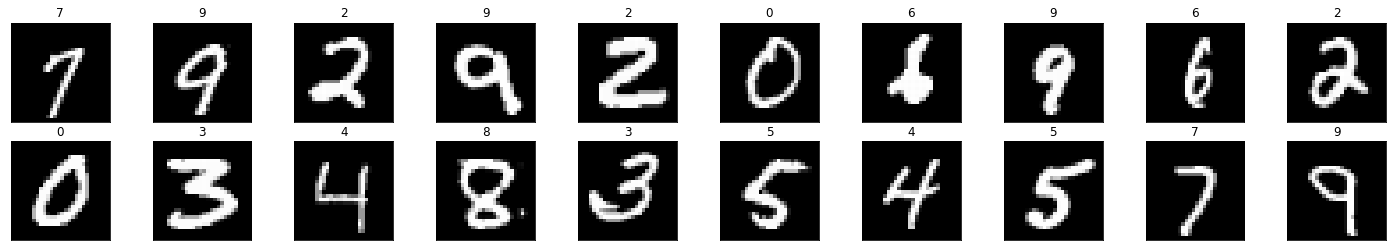

In [4]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(labels[idx].item())

In [5]:
class Classifier(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [19]:
epochs = 12
running_loss_history = []
running_corrects_history = []

val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0

    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1) #1, 28, 28 -> flatten: 1, 784
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                val_loss= criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
                

        epoch_loss = running_loss / len(training_loader)
        epoch_acc = running_corrects.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc)

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_acc = val_running_corrects.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)

        print('epoch: ', e+1)
        print('training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_acc))
        print('validation loss: {:.4f}, validation acc: {:.4f}'.format(val_epoch_loss, val_epoch_acc))
    

epoch:  1 train length:  600 val length 100
training loss: 0.1477, acc: 95.7700
validation loss: 0.1470, validation acc: 95.6500
epoch:  2 train length:  600 val length 100
training loss: 0.1387, acc: 95.9933
validation loss: 0.1410, validation acc: 95.7600
epoch:  3 train length:  600 val length 100
training loss: 0.1313, acc: 96.2150
validation loss: 0.1396, validation acc: 95.7600
epoch:  4 train length:  600 val length 100
training loss: 0.1244, acc: 96.4350
validation loss: 0.1326, validation acc: 95.9700
epoch:  5 train length:  600 val length 100
training loss: 0.1180, acc: 96.6500
validation loss: 0.1272, validation acc: 96.2900
epoch:  6 train length:  600 val length 100
training loss: 0.1117, acc: 96.7733
validation loss: 0.1227, validation acc: 96.3700
epoch:  7 train length:  600 val length 100
training loss: 0.1065, acc: 96.9367
validation loss: 0.1156, validation acc: 96.5000
epoch:  8 train length:  600 val length 100
training loss: 0.1013, acc: 97.0883
validation loss: 

In [8]:
# plt.plot(running_loss_history, label='training loss') # lr = 0.01

In [9]:
# plt.plot(running_loss_history, label='training loss') # lr = 0.001

In [10]:
# plt.plot(running_corrects_history, label='training loss')  # lr = 0.001

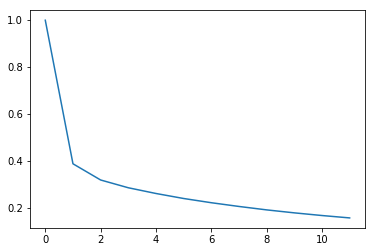

In [11]:
plt.plot(running_loss_history, label='training loss') # lr = 0.0001

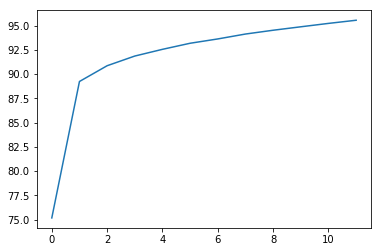

In [12]:
plt.plot(running_corrects_history, label='training loss')  # lr = 0.0001

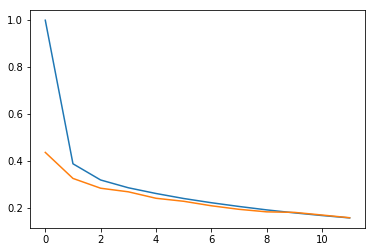

In [13]:
# with validation loader
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')

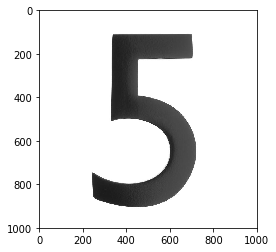

In [14]:
import requests
from PIL import Image
import PIL.ImageOps

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

(28, 28, 1)


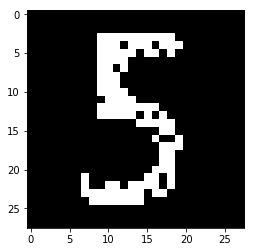

In [15]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# img = img.resize((28,28))
img = PIL.ImageOps.invert(img) # RGB -> black n whte
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [16]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


In [17]:
images.shape, 28*28

(torch.Size([100, 1, 28, 28]), 784)

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


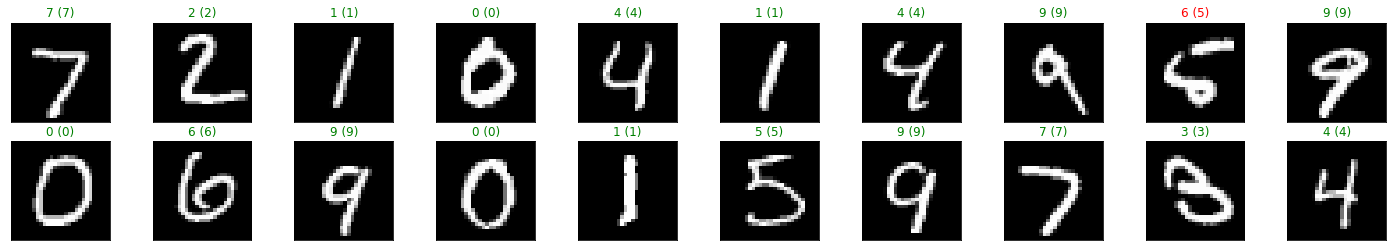

In [23]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0],-1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format( preds[idx].item(), labels[idx].item()), 
                 color = ('green' if preds[idx] == labels[idx] else 'red')  )